In [117]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py 
import plotly.io as pio
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly

from collections import Counter # To do counter of some features
 

df_credit = pd.read_csv("loan.csv")

# Data Understanding  

In [118]:
#List the different values for loan_status
print(df_credit.loan_status.value_counts())

#Eliminate rows where customer is in the process of paying installments ( loan_status = 'Current') and validate
df_credit1=df_credit[df_credit.loan_status != 'Current']
print(df_credit1.loan_status.value_counts())

#Convert loan status to a numerical column by assigning 1 for defaulted loans
df_credit1['loan_status_bin'] = df_credit1.loan_status.apply(lambda x: 0 if x=="Fully Paid" else 1)



Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


# Data Cleaning

In [119]:
#Find null values and drop columns where all values are null
df_credit1.isnull().sum()

df_credit1 = df_credit1.drop(['mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','tot_hi_cred_lim'   ], 1)
df_credit1 = df_credit1.drop(['il_util','next_pymnt_d' ,'mths_since_last_major_derog', 'annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_coll_amt', 'tot_cur_bal'  ,  'open_acc_6m',
 'open_il_6m'  ,  'open_il_12m',   'open_il_24m'  ,  'mths_since_rcnt_il',   'total_bal_il'   ,  'open_rv_12m',    'open_rv_24m' ,   'max_bal_bc',    'all_util' ,  'total_rev_hi_lim',     
 'inq_fi' ,     'total_cu_tl',      'inq_last_12m' ,      'acc_open_past_24mths',   'avg_cur_bal' ,  'bc_open_to_buy',       'bc_util'], 1)           

#Drop 1 row where annual income is null 
df_credit1 = df_credit1[~df_credit1.annual_inc.isnull()]

#Drop 150 rows where funded_amnt_inv < 1, since this would not help in our analysis
df_credit1 =  df_credit1 [df_credit1.funded_amnt_inv > 1] 

#Remove percentage sign from int_rate
df_credit1.int_rate=df_credit1.int_rate.apply(lambda x: 0 if x=="0" else str(x[:-1]))
df_credit1.int_rate=df_credit1.int_rate.astype("float64")

### Univariate  analysis for Good vs Bad loan

In [120]:
print (df_credit1.loan_status.value_counts())
# Fully paid loans are 32847 and defaulted loans are 5580

Fully Paid     32847
Charged Off     5580
Name: loan_status, dtype: int64


### Data analysis - Annual Inc

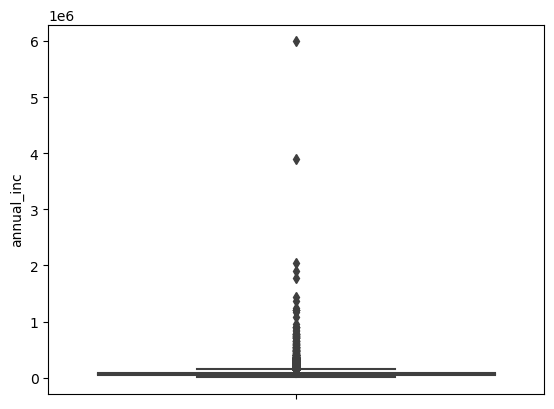

In [121]:
### Univariate analysis of annual income to detect outliers
sns.boxplot(y=df_credit1.annual_inc)
plt.show()

In [122]:
### Univariate analysis of annual income to detect outliers
df_credit1.annual_inc.describe(percentiles=[0,0.25,0.75,0.80,0.90,0.99]) 

count    3.842700e+04
mean     6.881839e+04
std      6.427494e+04
min      4.000000e+03
0%       4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
80%      9.000000e+04
90%      1.151725e+05
99%      2.344440e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

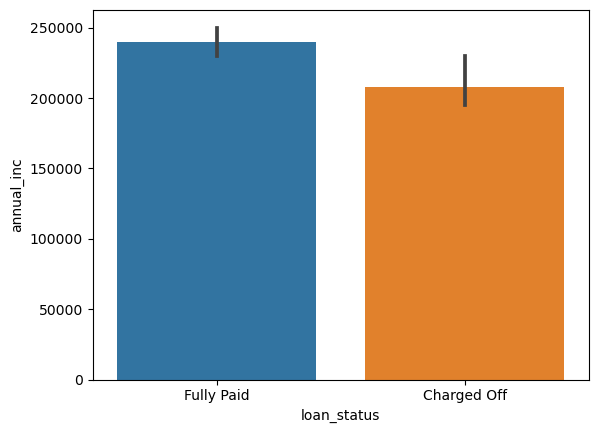

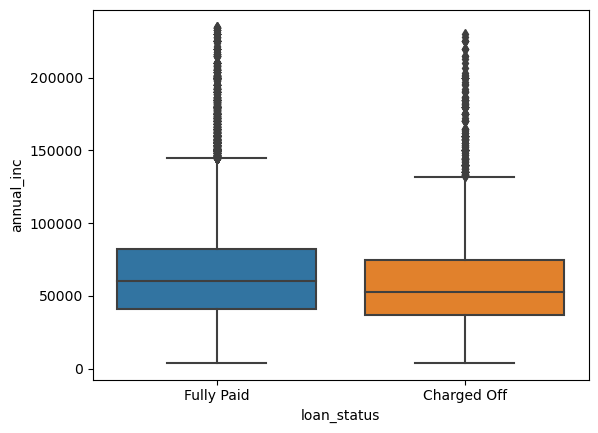

In [123]:
#Since we have outliers after 99%, constructing  a barplot and boxplot till the 99th quantile
sns.barplot(data=df_credit1, x="loan_status", y="annual_inc", estimator=lambda x: np.quantile(x,0.99))
plt.show()
df_credit2=df_credit1[df_credit1.annual_inc < 235000 ] # ignoring outliers
sns.boxplot(x=df_credit2.loan_status,y=df_credit2.annual_inc)
plt.show()


In [124]:
#Checking the annual income spread for defaulted and fully paid loans
print(df_credit1[df_credit1.loan_status_bin==1].annual_inc.describe(percentiles=[0,0.25,0.75,0.80,0.90,0.99])) #defaulted
print(df_credit1[df_credit1.loan_status_bin==0].annual_inc.describe(percentiles=[0,0.25,0.75,0.80,0.90,0.99])) #fully paid
# Conclusion - Customers that have fully paid have a marginally higher mean annual income  

count    5.580000e+03
mean     6.248785e+04
std      4.792002e+04
min      4.080000e+03
0%       4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
80%      8.000400e+04
90%      1.040000e+05
99%      2.076300e+05
max      1.250000e+06
Name: annual_inc, dtype: float64
count    3.284700e+04
mean     6.989382e+04
std      6.659654e+04
min      4.000000e+03
0%       4.000000e+03
25%      4.128000e+04
50%      6.000000e+04
75%      8.400000e+04
80%      9.100000e+04
90%      1.181934e+05
99%      2.400000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64


### Data analysis - Interest Rate

In [125]:
#Check the spread of interest rate - no outliers
df_credit1.int_rate.describe()

count    38427.000000
mean        11.936697
std          3.695907
min          5.420000
25%          8.940000
50%         11.710000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

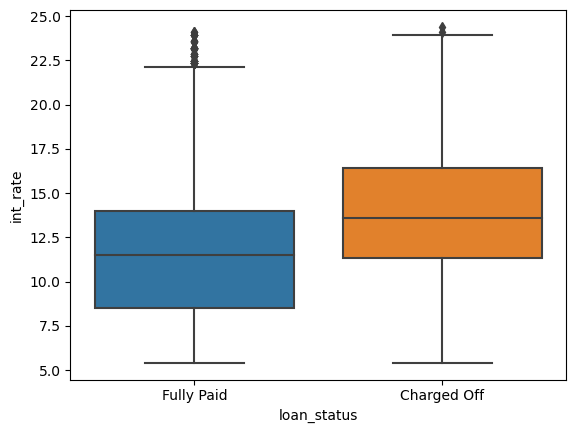

In [126]:
#Check the spread of interest rate across both fully paid(loan status = 0) and defaulted customers (loan_status = 1)
sns.boxplot(x=df_credit1.loan_status,y=df_credit1.int_rate)
plt.show()

In [127]:
#Checking the interest rate spread for defaulted and fully paid loans
print(df_credit1[df_credit1.loan_status_bin ==1].int_rate.describe( ), "Default") #defaulted
print(df_credit1[df_credit1.loan_status_bin ==0].int_rate.describe( ), "Fully Paid") #fully paid
#Conclusion - Loans are likely to be defaulted if the interest rate is in Inter quartile range of 11.3% to 16.4%

count    5580.000000
mean       13.840427
std         3.660548
min         5.420000
25%        11.360000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64 Default
count    32847.000000
mean        11.613294
std          3.603338
min          5.420000
25%          8.490000
50%         11.490000
75%         13.990000
max         24.110000
Name: int_rate, dtype: float64 Fully Paid


### Data Analysis - funded_amnt_inv

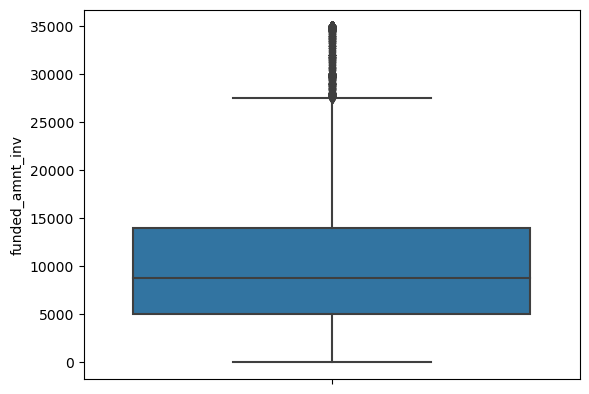

In [128]:
#Understand the spread for funded_amt_inv
sns.boxplot(y=df_credit1.funded_amnt_inv)
plt.show() 

In [129]:
#Check if any outliers
print(df_credit1 .funded_amnt_inv.describe(percentiles=[0,0.01,0.2,0.25,0.75,0.80,0.85,0.90,0.97]))

count    38427.000000
mean     10262.384618
std       7007.254111
min         12.000000
0%          12.000000
1%         950.000000
20%       4475.000000
25%       5000.000000
50%       8788.598974
75%      14000.000000
80%      15000.000000
85%      17525.000000
90%      19994.697330
97%      25850.920341
max      35000.000000
Name: funded_amnt_inv, dtype: float64


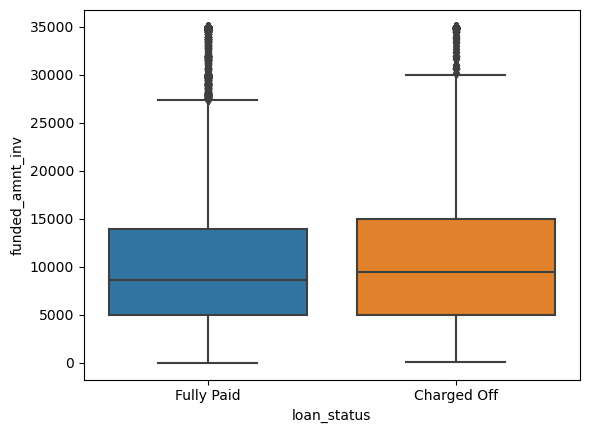

In [130]:
#Check the spread of funded amount inv across both fully paid and defaulted customers
sns.boxplot(x=df_credit1.loan_status,y=df_credit1.funded_amnt_inv)
plt.show()

In [131]:
print(df_credit1[df_credit1.loan_status_bin ==1].funded_amnt_inv.describe( ), "Default") #defaulted
print(df_credit1[df_credit1.loan_status_bin ==0].funded_amnt_inv.describe( ), "Fully Paid") #fully paid
# Conclusion - Funded amount range is similar in both categories. So this does not have a strong correlation with a lon either being fully paid or defaulted. 
# Loan amount in any range can be be either fully paid or defaulted.

count     5580.000000
mean     10956.032510
std       7628.510851
min         52.449231
25%       5000.000000
50%       9501.850000
75%      15000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64 Default
count    32847.000000
mean     10144.548736
std       6889.345256
min         12.000000
25%       5000.000000
50%       8600.000000
75%      13973.125565
max      35000.000000
Name: funded_amnt_inv, dtype: float64 Fully Paid


### Data Analysis - dti

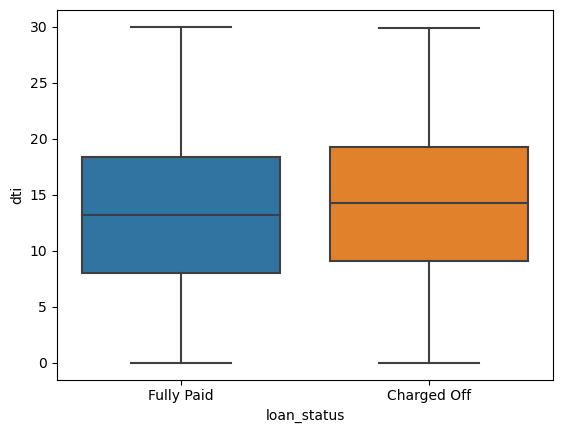

In [132]:
#Check the spread of dti across both fully paid and defaulted customers
sns.boxplot(x=df_credit1.loan_status,y=df_credit1.dti)
plt.show()

In [133]:
print(df_credit1[df_credit1.loan_status_bin ==1].dti.describe( ), "Default") #defaulted
print(df_credit1[df_credit1.loan_status_bin ==0].dti.describe( ), "Fully Paid") #fully paid
# Conclusion - Customers with defaulted loans have a slightly higher  dti

count    5580.000000
mean       14.007839
std         6.588047
min         0.000000
25%         9.050000
50%        14.295000
75%        19.300000
max        29.850000
Name: dti, dtype: float64 Default
count    32847.000000
mean        13.155223
std          6.677727
min          0.000000
25%          7.990000
50%         13.200000
75%         18.400000
max         29.990000
Name: dti, dtype: float64 Fully Paid


### Data Analysis - Grade

In [134]:
 ## Grade distribution

df_good = df_credit1[df_credit1["loan_status_bin"]== 0]['grade'].values.tolist()
df_bad =df_credit1[df_credit1["loan_status_bin"]== 1]['grade'].values.tolist()
df_loan_amnt = df_credit1['grade'].values.tolist()
 

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Fully paid loan"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Defaulted loan"
)
#Third plot
tr2 = go.Histogram(
    x=df_loan_amnt,
    histnorm='probability',
    name="Overall grades"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fully Paid','Defaulted', 'General Distribution'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Grade Distribution', bargap=0.01)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')
#Conclusion - Customers with grade A are more likely to fully pay up the loans. E, F and G are more likely to default.

### Data analysis - Subgrade 

In [135]:
#Find the top 20 subgrades for both good and bad loans
print(df_credit1[df_credit1["loan_status_bin"]== 0]['sub_grade'].value_counts()[:25].index.tolist())
print(df_credit1[df_credit1["loan_status_bin"]== 1]['sub_grade'].value_counts()[:25].index.tolist())

['A4', 'A5', 'B3', 'B5', 'B4', 'B2', 'C1', 'A3', 'B1', 'C2', 'A2', 'C3', 'A1', 'D2', 'C4', 'C5', 'D3', 'D1', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5']
['B5', 'B3', 'C1', 'B4', 'C2', 'C3', 'D2', 'D3', 'B2', 'A5', 'D4', 'C4', 'D5', 'C5', 'E1', 'A4', 'B1', 'D1', 'E2', 'E4', 'E3', 'E5', 'A3', 'F1', 'A2']


In [136]:
 ## Sub Grade distribution
 
df_good = df_credit1[df_credit1["loan_status_bin"]== 0]['sub_grade'].values.tolist() 
df_bad =df_credit1[df_credit1["loan_status_bin"]== 1]['sub_grade'].values.tolist() 
df_loan_amnt = df_credit1['sub_grade'].values.tolist()
 

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Fully paid loan"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Defaulted loan"
)
#Third plot
tr2 = go.Histogram(
    x=df_loan_amnt,
    histnorm='probability',
    name="Overall subgrades"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fully Paid','Defaulted', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Sub grade Distribuition', bargap=0.01)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')
#Conclusion - Subgrades for Fully paid loans -   a1-a5, b1, 
#Subgrades for Defaulted loans - d2, d3, e1, e2, e4, f1

### Data Analysis - Annual income vs Inv funded amnt

In [137]:
#Create  buckets for Annual income
df_credit1['Annual_income_bucket']=pd.qcut ( df_credit1.annual_inc,[0, 0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

#Create a new variable - the ratio of inv funded amount to the annual income
df_credit1['percent_of_annual'] = df_credit1['funded_amnt_inv']/df_credit['annual_inc']

In [138]:
#Plot inv funded income vs annual income buckets

df_good = df_credit1[df_credit1["loan_status_bin"] == 0] ## Fully paid
df_bad = df_credit1[df_credit1["loan_status_bin"] == 1] ##Defaulted


tr0 = go.Box(
    y=df_good["percent_of_annual"],
    x=df_good["Annual_income_bucket"],
    name='Fully Paid',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=df_bad['percent_of_annual'],
    x=df_bad['Annual_income_bucket'],
    name='Defaulted',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Funded amount inv/Annual Income',
        zeroline=False
    ),
    xaxis=dict(
        title='Annual Income bucket'
    ),
    boxmode='group'
)
pio.renderers.default = 'iframe'
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='box-age-cat')
#fig.show()
#Conclusion - For  any given annual income bucket, if the funded amount is beyond a certan percentage of annual income, 
#there is more likelihood of defaulted loans. For example, in the medium annual income bracket, if funded amount is 
#greater than 44% of annual income, there is more likelihood of default

### Data Analysis - Term of loan

In [139]:
df_good = df_credit1[df_credit1["loan_status_bin"]== 0]['term'].values.tolist()
df_bad =df_credit1[df_credit1["loan_status_bin"]== 1]['term'].values.tolist()
df_loan_amnt = df_credit1['term'].values.tolist()
 

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Fully paid loan"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Defaulted loan"
)
#Third plot
tr2 = go.Histogram(
    x=df_loan_amnt,
    histnorm='probability',
    name="Overall term"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fully paid','Defaulted', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Term Distribuition', bargap=0.01)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')
#Conclusion - Likelihood of default is more if the term is 60 months 

### Data analysis - home ownership

In [140]:
df_good = df_credit1[df_credit1["loan_status_bin"]==0]['home_ownership'].values.tolist()
df_bad = df_credit1[df_credit1["loan_status_bin"]== 1] ['home_ownership'].values.tolist()
df_loan_amnt = df_credit1 ['home_ownership'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Fully paid loan"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Defaulted loan"
)
#Third plot
tr2 = go.Histogram(
    x=df_loan_amnt,
    histnorm='probability',
    name="Overall home ownership"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fully Paid','Defaulted', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Home ownership Distribuition', bargap=0.03)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')
#Conclusion - No significant drivering factors

### Data Analysis - Emp_length

In [141]:
df_good = df_credit1[df_credit1["loan_status_bin"]==0]['emp_length'].values.tolist()
df_bad = df_credit1[df_credit1["loan_status_bin"]== 1] ['emp_length'].values.tolist()
df_loan_amnt = df_credit1 ['emp_length'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Fully Paid loan"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Defaulted loan"
)
#Third plot
tr2 = go.Histogram(
    x=df_loan_amnt,
    histnorm='probability',
    name="Overall emp length"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fully Paid','Defaulted', 'General Distribution'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Employment Length  Distribution', bargap=0.03)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')
#Conclusion - No significant driving factors

### Data analysis - Verification Status

In [142]:
df_good = df_credit1[df_credit1["loan_status_bin"]==0]['verification_status'].values.tolist()
df_bad = df_credit1[df_credit1["loan_status_bin"]== 1] ['verification_status'].values.tolist()
df_loan_amnt = df_credit1 ['verification_status'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Fully paid loan"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Defaulted loan"
)
#Third plot
tr2 = go.Histogram(
    x=df_loan_amnt,
    histnorm='probability',
    name="Overall verification status"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fully paid','Defaulted', 'General Distribution'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Verification Status Distribution', bargap=0.03)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')
#Conclusion - Surprisignly, Verified customers have a slightly higher probablity of default.

### Data analysis - purpose

In [143]:
df_good = df_credit1[df_credit1["loan_status_bin"]==0]['purpose'].values.tolist()
df_bad = df_credit1[df_credit1["loan_status_bin"]== 1] ['purpose'].values.tolist()
df_loan_amnt = df_credit1 ['purpose'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Fully paid loan"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Defaulted loan"
)
#Third plot
tr2 = go.Histogram(
    x=df_loan_amnt,
    histnorm='probability',
    name="Overall purpose"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fully paid','Defaulted', 'General Distribution'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Purpose Distribution', bargap=0.03)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')


In [144]:
#Find the top 20 pupose for both good and bad loans
print(df_credit1[df_credit1["loan_status_bin"]== 0]['purpose'].value_counts()[:25].index.tolist())
print(df_credit1[df_credit1["loan_status_bin"]== 1]['purpose'].value_counts()[:25].index.tolist())
#Conclusion , fully paid loans - credit card, wedding
#bad loans - small business

['debt_consolidation', 'credit_card', 'other', 'home_improvement', 'major_purchase', 'car', 'small_business', 'wedding', 'medical', 'moving', 'vacation', 'house', 'educational', 'renewable_energy']
['debt_consolidation', 'other', 'credit_card', 'small_business', 'home_improvement', 'major_purchase', 'car', 'medical', 'wedding', 'moving', 'house', 'educational', 'vacation', 'renewable_energy']
